In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm import tqdm

from matplotlib_venn import venn3

In [2]:
import sys
sys.path.append('../../code')

from splits import get_lo_split, set_cluster_columns, get_nearest_mols

In [3]:
kcnh2 = pd.read_csv('../../data/raw/kcnh2_lo.csv', index_col=0)
kcnh2

,smiles,value
0,Brc1ccc(Nc2ccc(CN3CCC4(CC3)OCCc3sccc34)cc2)cc1,5.370201
1,Brc1ccc2c(NC3=NC[C@@]4(CN5CCC4CC5)O3)ncnn12,5.601886
2,Brc1cnc2nc(N3CCN4CCC3CC4)oc2c1,5.638083
3,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,5.161088
4,C#Cc1cnc(Nc2cnc(C#N)c(O[C@H](C)CN(C)C)n2)cc1NC,5.096856
...,...,...
4577,c1cnc2c(N3CCN(CCc4ccc(OCCCN5CCCCCC5)cc4)CC3)cc...,5.099945
4578,c1cncc(-c2c[nH]c([C@H]3Cc4c([nH]c5ccccc45)C(C4...,6.718967
4579,c1cncc(-c2c[nH]c([C@H]3Cc4c([nH]c5ccccc45)[C@@...,5.568315
4580,c1cncc(-c2ccc(-c3noc(C4CN5CCC4CC5)n3)o2)c1,5.193752


In [4]:
splits = []

smiles = np.array(kcnh2['smiles'].to_list())
values = np.array(kcnh2['value'].to_list())

for i in tqdm(range(3)):
    idx = np.arange(len(smiles))
    np.random.seed(i)
    np.random.shuffle(idx)

    shuffled_smiles = smiles[idx]
    shuffled_values = values[idx]
    cluster_smiles, train_smiles = get_lo_split(shuffled_smiles, 0.4, 5, 50, shuffled_values, std_threshold=0.70)
    split = set_cluster_columns(kcnh2, cluster_smiles, train_smiles)
    splits.append(split)

100%|██████████| 3/3 [06:29<00:00, 129.99s/it]


In [9]:
splits[0]['cluster'].max()

34

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 2.,
        2., 1., 1., 3., 2., 3., 1., 1., 0., 1., 0., 2., 0., 0., 2., 1., 1.,
        1., 0., 1., 0., 0., 0., 3., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 array([0.36091032, 0.38348403, 0.40605774, 0.42863145, 0.45120516,
        0.47377887, 0.49635259, 0.5189263 , 0.54150001, 0.56407372,
        0.58664743, 0.60922114, 0.63179485, 0.65436856, 0.67694228,
        0.69951599, 0.7220897 , 0.74466341, 0.76723712, 0.78981083,
        0.81238454, 0.83495826, 0.85753197, 0.88010568, 0.90267939,
        0.9252531 , 0.94782681, 0.97040052, 0.99297424, 1.01554795,
        1.03812166, 1.06069537, 1.08326908, 1.10584279, 1.1284165 ,
        1.15099022, 1.17356393, 1.19613764, 1.21871135, 1.24128506,
        1.26385877, 1.28643248, 1.30900619, 1.33157991, 1.35415362,
        1.37672733, 1.39930104, 1.42187475, 1.44444846, 1.46702217,
        1.48959589]),
 <BarContainer object of 50 artists>)

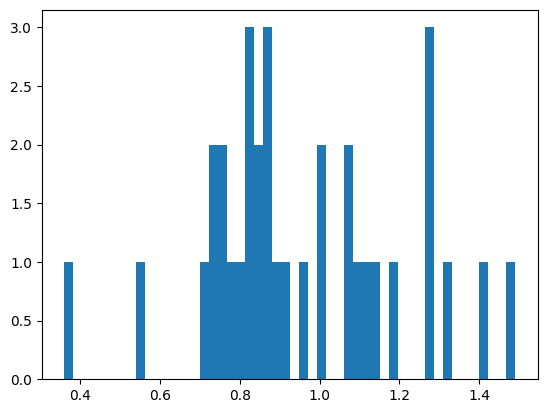

In [8]:
split = splits[1]

per_cluster_std = []
for i in range(split['cluster'].max()):
    cluster = split[split['cluster'] == i]
    std = cluster['value'].std()
    per_cluster_std.append(std)
plt.hist(per_cluster_std, bins=50)

In [10]:
data = splits[0]
test_0 = data[data['cluster'] != 0]['smiles'].to_list()

data = splits[1]
test_1 = data[data['cluster'] != 0]['smiles'].to_list()

data = splits[2]
test_2 = data[data['cluster'] != 0]['smiles'].to_list()

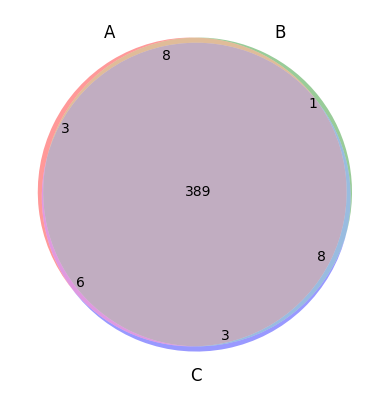

In [11]:
venn3([
    set(test_0),
    set(test_1),
    set(test_2),
])

In [12]:
data = splits[0]
is_train = data['cluster'] == 0
train_0 = data[is_train].reset_index(drop=True)
train_0.to_csv('../../data/lo/kcnh2/train_1.csv')
test_0 = data[~is_train].reset_index(drop=True)
test_0.to_csv('../../data/lo/kcnh2/test_1.csv')

In [13]:
train_0

,smiles,value,cluster
0,Brc1ccc2c(NC3=NC[C@@]4(CN5CCC4CC5)O3)ncnn12,5.601886,0
1,Brc1cnc2nc(N3CCN4CCC3CC4)oc2c1,5.638083,0
2,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,5.161088,0
3,C#Cc1cnc(Nc2cnc(C#N)c(O[C@H](C)CN(C)C)n2)cc1NC,5.096856,0
4,C#Cc1cnc(Nc2cnc(C#N)cn2)cc1NC[C@@H]1CNCCO1,5.086133,0
...,...,...,...
3308,c1cnc2c(N3CCN(CCCCc4ccc(OCCCN5CCCCCC5)cc4)CC3)...,5.799727,0
3309,c1cnc2c(N3CCN(CCCc4ccc(OCCCN5CCCCCC5)cc4)CC3)c...,5.999566,0
3310,c1cnc2c(N3CCN(CCc4ccc(OCCCN5CCCCCC5)cc4)CC3)cc...,5.099945,0
3311,c1cncc(-c2ccc(-c3noc(C4CN5CCC4CC5)n3)o2)c1,5.193752,0


In [14]:
test_0['cluster'].value_counts()

34    54
33    43
32    33
31    29
30    18
29    16
27    15
28    15
26    13
25    12
24    11
23    10
22    10
20     9
21     9
19     8
17     8
18     8
15     7
16     7
14     6
5      5
13     5
11     5
3      5
12     5
2      5
10     5
8      5
4      5
6      5
7      5
1      5
9      5
Name: cluster, dtype: int64

In [15]:
data = splits[1]
is_train = data['cluster'] == 0
train_1 = data[is_train].reset_index(drop=True)
train_1.to_csv('../../data/lo/kcnh2/train_2.csv')
test_1 = data[~is_train].reset_index(drop=True)
test_1.to_csv('../../data/lo/kcnh2/test_2.csv')

In [16]:
data = splits[2]
is_train = data['cluster'] == 0
train_2 = data[is_train].reset_index(drop=True)
train_2.to_csv('../../data/lo/kcnh2/train_3.csv')
test_2 = data[~is_train].reset_index(drop=True)
test_2.to_csv('../../data/lo/kcnh2/test_3.csv')

# t-SNE

In [17]:
mols = [Chem.MolFromSmiles(smile) for smile in data['smiles']]
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

In [18]:
fps_np = []
for f in fps:
    fps_np.append(np.array(f))
fps_np = np.array(fps_np)

In [19]:
from sklearn import manifold

sr_tsne = manifold.TSNE(n_components=2, perplexity=40, random_state=0).fit_transform(
    fps_np
)

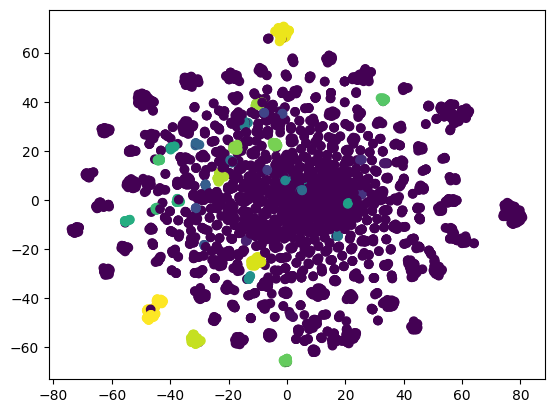

In [20]:
plt.scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=data['cluster'])

# Tests

In [21]:
# Ensure that for each test cluster there is only one similar molecule in the train
data = splits[0]
is_train = data['cluster'] == 0
train_smiles = data[is_train]['smiles'].to_list()

for i in data['cluster'].unique():
    if i == 0:
        continue
    is_in_cluster = data['cluster'] == i
    cluster = data[is_in_cluster]
    cluster_smiles = cluster['smiles'].to_list()
    nearest_sim = get_nearest_mols(train_smiles, cluster_smiles)
    nearest_sim = np.array(nearest_sim)
    is_too_close = nearest_sim > 0.4
    assert is_too_close.sum() == 1 